In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [24]:
digits=load_digits()
X=digits.data
y=digits.target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_train)
# X_test_pca = pca.fit_transform(X_test)
model=KNeighborsClassifier(n_neighbors=20)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9805555555555555

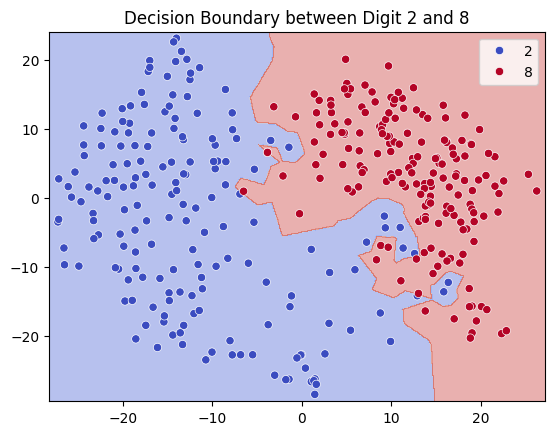

In [26]:
def decision_boundary(k):
    # Select only classes 1 and 7
    mask = (y == 2) | (y == 8)
    X_2class = X[mask]
    y_2class = y[mask]

    # PCA to 2D
    X_2class_pca = PCA(n_components=2).fit_transform(X_2class)

    # Train logistic regression
    # model = LogisticRegression()
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_2class_pca, y_2class)

    # Plot
    h = .1
    x_min, x_max = X_2class_pca[:, 0].min() - 1, X_2class_pca[:, 0].max() + 1
    y_min, y_max = X_2class_pca[:, 1].min() - 1, X_2class_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X_2class_pca[:, 0], y=X_2class_pca[:, 1], hue=y_2class, palette='coolwarm')
    # plot_decision_regions(X_2class_pca,y_2class,clf=model,legend=2)
    plt.title("Decision Boundary between Digit 2 and 8")
    plt.show()
decision_boundary(1)

Patches shows overfiting

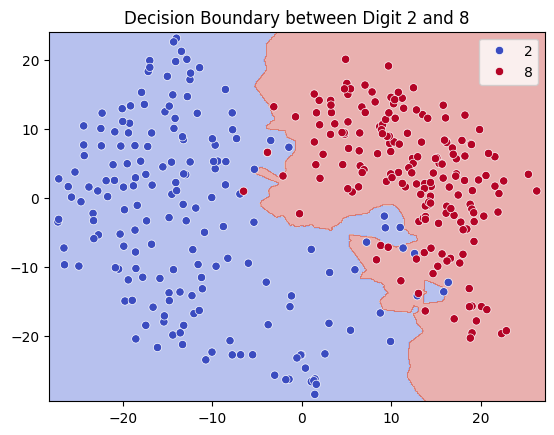

In [27]:
decision_boundary(5)

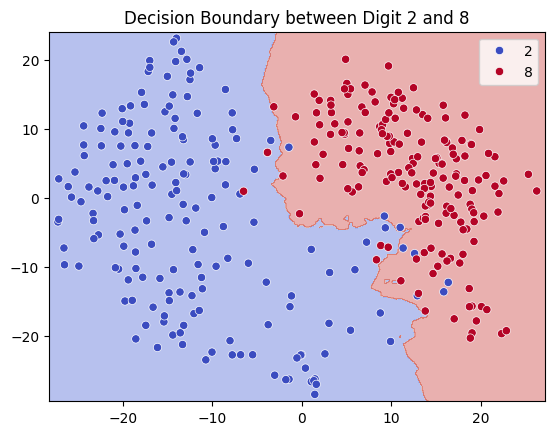

In [28]:
decision_boundary(10)

KNN does not have regualrisation as it does not have any weights to penalise and also does not have any training phase

In [29]:
param_grid = {
    'n_neighbors':[1,5,10,15,20,25,30,40]
}
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test data
print("Test Accuracy:", grid.score(X_test, y_test))

Best Parameters: {'n_neighbors': 1}
Best Cross-Validation Score: 0.986774099883856
Test Accuracy: 0.9916666666666667


In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test)

0.9722222222222222

In [41]:
param_grid = {
    'n_neighbors':[1,5,10,15,20,25,30,40],
    'metric':['manhattan','euclidean'],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test data
print("Test Accuracy:", grid.score(X_test_scaled, y_test))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Score: 0.9770325203252034
Test Accuracy: 0.9777777777777777
